In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import scipy.stats
import scipy.stats as stats 

In [2]:
#change directory
import os
os.chdir('C:\LY\springboard\capstone projects\cervical cancer')

In [3]:
filename = "cervical_cancer_data_wrangling.csv"

In [4]:
data = pd.read_csv(filename)

In [5]:
#drop columns
df_new = data.drop(['Unnamed: 0','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Hinselmann','Schiller','Citology'],axis=1)

In [6]:
#cols with numeric data
numeric_cols = ['Age','Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
                'STDs: Number of diagnosis']

In [7]:
#cols with catagorical data
cata_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 
             'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 
             'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
             'Dx:HPV', 'Dx']

In [106]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# preprocessing

In [10]:
#standardize
from sklearn import preprocessing

for col in df_new[numeric_cols][:-1]:
    df_new[col]= preprocessing.scale(df_new[col])

df_new.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
count,8.580000e+02,8.580000e+02,8.580000e+02,8.580000e+02,858.000000,8.580000e+02,8.580000e+02,858.000000,8.580000e+02,858.000000,...,858.0,858.000000,858.000000,858.000000,8.580000e+02,858.000000,858.000000,858.000000,858.000000,858.000000
mean,3.718212e-16,1.907306e-16,7.660280e-17,2.207506e-16,0.143357,-9.562410e-17,-1.412364e-16,0.686480,-1.451183e-16,0.096737,...,0.0,0.020979,0.001166,0.002331,-6.870961e-17,0.020979,0.010490,0.020979,0.027972,0.064103
std,1.000583e+00,1.000583e+00,1.000583e+00,1.000583e+00,0.350641,1.000583e+00,1.000583e+00,0.464194,1.000583e+00,0.295771,...,0.0,0.143398,0.034139,0.048252,1.000583e+00,0.143398,0.101939,0.143398,0.164989,0.245078
min,-1.627284e+00,-9.196100e-01,-2.507060e+00,-1.612364e+00,0.000000,-2.959993e-01,-2.020215e-01,0.000000,-5.709267e-01,0.000000,...,0.0,0.000000,0.000000,0.000000,-2.890930e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.030752e-01,-3.112635e-01,-7.151094e-01,-8.981627e-01,0.000000,-2.959993e-01,-2.020215e-01,0.000000,-5.709267e-01,0.000000,...,0.0,0.000000,0.000000,0.000000,-2.890930e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.143546e-01,-3.112635e-01,1.670816e-03,-1.839610e-01,0.000000,-2.959993e-01,-2.020215e-01,1.000000,-4.306727e-01,0.000000,...,0.0,0.000000,0.000000,0.000000,-2.890930e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.098541e-01,2.970830e-01,3.600609e-01,5.302406e-01,0.000000,-2.959993e-01,-2.020215e-01,1.000000,-9.910759e-03,0.000000,...,0.0,0.000000,0.000000,0.000000,-2.890930e-01,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.732547e+00,1.550575e+01,5.377522e+00,6.243854e+00,1.000000,8.821219e+00,1.654716e+01,1.000000,7.844313e+00,1.000000,...,0.0,1.000000,1.000000,1.000000,9.632579e+00,1.000000,1.000000,1.000000,1.000000,1.000000


# modeling

## splitting training and test set

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set.
Xtrain, Xtest, ytrain, ytest = train_test_split(df_new.drop(['Biopsy'], axis=1),df_new['Biopsy'] ,test_size=0.2,random_state=5)

ytest.value_counts()

0    163
1      9
Name: Biopsy, dtype: int64

## Helper function to print the scores for evaluating the classifiers

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def helper(classificationmethod):
    
    pred = classificationmethod.predict(Xtest)
    confusion_matrix(ytest, pred)
    tn, fp,fn, tp = confusion_matrix(ytest, pred).ravel()
    # Print the scores from the testing data.
    print('accuracy_score=', accuracy_score(ytest,pred))
    print('recall_score=', recall_score(ytest,pred))
    print('f1_score', f1_score(ytest,pred))
    print('precision_score=', precision_score(ytest,pred))
    print(classification_report(ytest, pred))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)
    
def fea_selection_helper(classificationmethod,X_select):
    
    pred = classificationmethod.predict(X_select)
    confusion_matrix(ytest, pred)
    tn, fp,fn, tp = confusion_matrix(ytest, pred).ravel()
    # Print the scores from the testing data.
    print('accuracy_score=', accuracy_score(ytest,pred))
    print('recall_score=', recall_score(ytest,pred))
    print('f1_score', f1_score(ytest,pred))
    print('precision_score=', precision_score(ytest,pred))
    print(classification_report(ytest, pred))##, target_names=target_names))
    print('tn=',tn, ', fp=',fp, ', fn=',fn,', tp=',tp)


# import modules

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Logistic regression
from sklearn.linear_model import LogisticRegression
#Support vector machine
from sklearn.svm import SVC
#Decision tree
from sklearn import tree
#Random forest
from sklearn.ensemble import RandomForestClassifier

## Logistic regression

In [113]:
def lrc_helper(X,y,score):
    
    # tuning the model
    # Setup the hyperparameter grid
    c_space = [0.0001,0.001,0.01,0.1,1,10,100]

    param_grid = {'C': c_space}

    # Instantiate a logistic regression classifier:lrc
    lrc = LogisticRegression()

    # Instantiate the GridSearchCV object: lr_cv
    lr_cv = GridSearchCV(lrc, param_grid, scoring = score, cv=5)  # recall_weighted

    # Fit it to the data
    lr_cv.fit(X,y)
    
    best_c = lr_cv.best_params_['C']

    print(lr_cv.best_params_)
    
    # Instantiate a logistic regression classifier using best C:lrc
    lrc = LogisticRegression(C=best_c)
    
    # Fit the model on the trainng data.
    lrc.fit(X, y)

    # Print the scores from the testing data.
    helper(lrc)
    
lrc_helper(Xtrain,ytrain,'recall')

{'C': 100}
accuracy_score= 0.9418604651162791
recall_score= 0.1111111111111111
f1_score 0.16666666666666666
precision_score= 0.3333333333333333
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       163
           1       0.33      0.11      0.17         9

   micro avg       0.94      0.94      0.94       172
   macro avg       0.64      0.55      0.57       172
weighted avg       0.92      0.94      0.93       172

tn= 161 , fp= 2 , fn= 8 , tp= 1


##### lrc feature selection

In [114]:
#feature importance
#intercept

lrc = LogisticRegression(C=100)
lrc.fit(Xtrain,ytrain)
coefs = lrc.coef_[0]
feature_ranks = []
for index,coef in enumerate(coefs):
#    print(df_new.columns[index])
    feature_ranks.append([coef, Xtrain.columns[index]])
feature_ranks = sorted(feature_ranks,key = lambda x:abs(x[0]))
fea_selected = [i[1] for i in feature_ranks[-11:] ]
fea_selected

lrc.fit(Xtrain[fea_selected],ytrain)
fea_selection_helper(lrc,Xtest[fea_selected])

accuracy_score= 0.9476744186046512
recall_score= 0.1111111111111111
f1_score 0.1818181818181818
precision_score= 0.5
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       163
           1       0.50      0.11      0.18         9

   micro avg       0.95      0.95      0.95       172
   macro avg       0.73      0.55      0.58       172
weighted avg       0.93      0.95      0.93       172

tn= 162 , fp= 1 , fn= 8 , tp= 1


Text(0.5, 1.0, 'Feature importance for Logistic Regression')

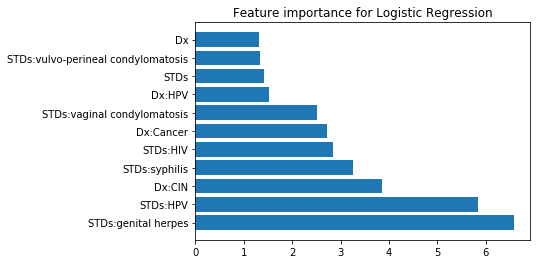

In [108]:
feature_selected = [i for i in feature_ranks[-11:] ]
feature_selected
index = [i[1] for i in feature_selected]
index.reverse()
value = [abs(i[0]) for i in feature_selected]
value.reverse()
plt.barh(index,value)
plt.title('Feature importance for Logistic Regression')

## support vector machine

In [115]:
def svm_helper(X,y,score):
    # tuning the model

    # Setup the hyperparameter grid
    SVM_c_space = [1,10,100]
    SVM_kernel_space = ['linear','rbf']

    param_grid = {'C': SVM_c_space,'kernel': SVM_kernel_space}

    # Instantiate a svc classifier: svm
    svm = SVC()

    # Instantiate the GridSearchCV object: svm_cv
    svm_cv = GridSearchCV(svm, param_grid, scoring = score, cv=5)

    # Fit it to the datas
    svm_cv.fit(X,y)

    print(svm_cv.best_params_)
    
    best_kernel = svm_cv.best_params_['kernel']
    best_c = svm_cv.best_params_['C']
    
    svm = SVC(kernel=best_kernel,C=best_c)
    svm.fit(X,y) #f1

    # Print the scores from the testing data.
    helper(svm)

svm_helper(Xtrain,ytrain,'recall')

{'C': 100, 'kernel': 'rbf'}
accuracy_score= 0.9127906976744186
recall_score= 0.2222222222222222
f1_score 0.2105263157894737
precision_score= 0.2
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       163
           1       0.20      0.22      0.21         9

   micro avg       0.91      0.91      0.91       172
   macro avg       0.58      0.59      0.58       172
weighted avg       0.92      0.91      0.91       172

tn= 155 , fp= 8 , fn= 7 , tp= 2


## decision tree

In [62]:
dt = tree.DecisionTreeClassifier(random_state=5)
dt.fit(Xtrain, ytrain)

# Print the scores from the testing data.
helper(dt)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(dt.get_params())

accuracy_score= 0.8895348837209303
recall_score= 0.4444444444444444
f1_score 0.2962962962962963
precision_score= 0.2222222222222222
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       163
           1       0.22      0.44      0.30         9

   micro avg       0.89      0.89      0.89       172
   macro avg       0.59      0.68      0.62       172
weighted avg       0.93      0.89      0.91       172

tn= 149 , fp= 14 , fn= 5 , tp= 4
Parameters currently in use:

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 5, 'splitter': 'best'}


### DT feature selection

[0.08100615 0.08492999 0.51758065 0.08104223 0.0052116  0.00359225
 0.03734919 0.00421126 0.05651358 0.00156617 0.02089065 0.
 0.00522057 0.00288072 0.         0.         0.03517388 0.
 0.         0.01724535 0.         0.         0.0028944  0.
 0.         0.00086098 0.00280621 0.         0.00132956 0.03769462]


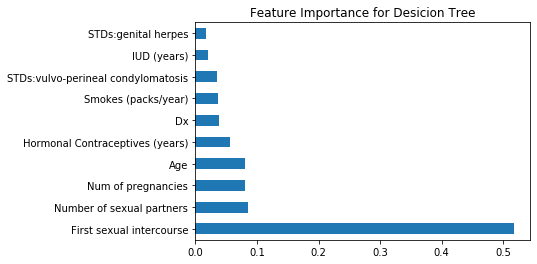

In [109]:
print(dt.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dt.feature_importances_, index=Xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance for Desicion Tree")
plt.show()

In [64]:
# using 10 most important features to train the model
dt.fit(Xtrain[feat_importances.nlargest(10).index], ytrain)

# Print the scores from the testing data.
fea_selection_helper(dt,Xtest[feat_importances.nlargest(10).index])

accuracy_score= 0.9069767441860465
recall_score= 0.6666666666666666
f1_score 0.42857142857142855
precision_score= 0.3157894736842105
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       163
           1       0.32      0.67      0.43         9

   micro avg       0.91      0.91      0.91       172
   macro avg       0.65      0.79      0.69       172
weighted avg       0.95      0.91      0.92       172

tn= 150 , fp= 13 , fn= 3 , tp= 6


# Random forest

In [112]:
def rfc_helper(X,y,score):
        
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rfc = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rfc_cv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=5, n_jobs = -1,scoring='recall')
    # Fit the random search model
    rfc_cv.fit(X, y)
    
    print(rfc_cv.best_params_)    

    # train model
    rfc = RandomForestClassifier(n_estimators =rfc_cv.best_params_['n_estimators'],
                                 min_samples_split=rfc_cv.best_params_['min_samples_split'],
                                 min_samples_leaf=rfc_cv.best_params_['min_samples_leaf'],
                                 max_features=rfc_cv.best_params_['max_features'],
                                 max_depth=rfc_cv.best_params_['max_depth'],
                                 bootstrap=rfc_cv.best_params_['bootstrap'],
                                 random_state = 5)
    rfc.fit(X, y)

    # Print the scores from the testing data.
    helper(rfc)
    
rfc_helper(Xtrain,ytrain,'recall')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.3s finished


{'n_estimators': 178, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
accuracy_score= 0.9534883720930233
recall_score= 0.3333333333333333
f1_score 0.42857142857142855
precision_score= 0.6
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       163
           1       0.60      0.33      0.43         9

   micro avg       0.95      0.95      0.95       172
   macro avg       0.78      0.66      0.70       172
weighted avg       0.95      0.95      0.95       172

tn= 161 , fp= 2 , fn= 6 , tp= 3


### rfc feature selection

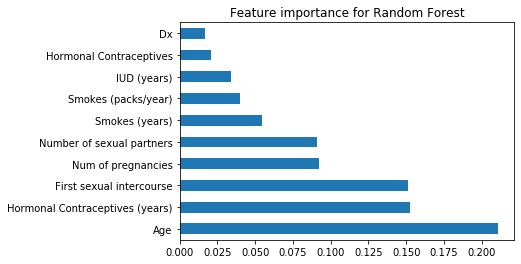

In [110]:
rfc = RandomForestClassifier(n_estimators =178,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=80,
                                 bootstrap=False,
                                 random_state = 5)
rfc.fit(Xtrain, ytrain)

#plot graph of feature importances for better visualization
feat_importances_rfc = pd.Series(rfc.feature_importances_, index=Xtrain.columns)
feat_importances_rfc.nlargest(10).plot(kind='barh')
plt.title('Feature importance for Random Forest')
plt.show()

In [111]:
# using 10 most important features to train the model
rfc.fit(Xtrain[feat_importances.nlargest(10).index], ytrain)

# Print the scores from the testing data.
fea_selection_helper(rfc,Xtest[feat_importances.nlargest(10).index])

accuracy_score= 0.9476744186046512
recall_score= 0.2222222222222222
f1_score 0.30769230769230765
precision_score= 0.5
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       163
           1       0.50      0.22      0.31         9

   micro avg       0.95      0.95      0.95       172
   macro avg       0.73      0.60      0.64       172
weighted avg       0.93      0.95      0.94       172

tn= 161 , fp= 2 , fn= 7 , tp= 2


# Dealing with Imbalanced Data

### upsampling

In [32]:
# upsample the minority class after splitting
from sklearn.utils import resample

X = pd.concat([Xtrain, ytrain], axis=1)

#Separate majority and mimnority classes
df_majority = X[X['Biopsy']==0]
df_minority = X[X['Biopsy']==1]

#upsample minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=5)   #sample with replacement

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

#display new class counts
df_upsampled.Biopsy.value_counts()

1    640
0    640
Name: Biopsy, dtype: int64

In [33]:
Xtrain_upsampled = df_upsampled.drop('Biopsy',axis=1)
ytrain_upsampled = df_upsampled.Biopsy

1280

In [116]:
lrc_helper(Xtrain_upsampled,ytrain_upsampled,'recall')

{'C': 0.01}
accuracy_score= 0.7441860465116279
recall_score= 0.5555555555555556
f1_score 0.18518518518518515
precision_score= 0.1111111111111111
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       163
           1       0.11      0.56      0.19         9

   micro avg       0.74      0.74      0.74       172
   macro avg       0.54      0.66      0.52       172
weighted avg       0.92      0.74      0.81       172

tn= 123 , fp= 40 , fn= 4 , tp= 5


In [117]:
svm_helper(Xtrain_upsampled,ytrain_upsampled,'recall')

{'C': 100, 'kernel': 'rbf'}
accuracy_score= 0.7790697674418605
recall_score= 0.3333333333333333
f1_score 0.13636363636363638
precision_score= 0.08571428571428572
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       163
           1       0.09      0.33      0.14         9

   micro avg       0.78      0.78      0.78       172
   macro avg       0.52      0.57      0.50       172
weighted avg       0.91      0.78      0.83       172

tn= 131 , fp= 32 , fn= 6 , tp= 3


In [40]:
dt.fit(Xtrain_upsampled, ytrain_upsampled)

# Print the scores from the testing data.
helper(dt)

accuracy_score= 0.9069767441860465
recall_score= 0.2222222222222222
f1_score 0.19999999999999998
precision_score= 0.18181818181818182
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       163
           1       0.18      0.22      0.20         9

   micro avg       0.91      0.91      0.91       172
   macro avg       0.57      0.58      0.58       172
weighted avg       0.92      0.91      0.91       172

tn= 154 , fp= 9 , fn= 7 , tp= 2


In [118]:
rfc_helper(Xtrain_upsampled,ytrain_upsampled,'recall')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.8s finished


{'n_estimators': 136, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
accuracy_score= 0.9593023255813954
recall_score= 0.2222222222222222
f1_score 0.3636363636363636
precision_score= 1.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       163
           1       1.00      0.22      0.36         9

   micro avg       0.96      0.96      0.96       172
   macro avg       0.98      0.61      0.67       172
weighted avg       0.96      0.96      0.95       172

tn= 163 , fp= 0 , fn= 7 , tp= 2


### downsampling

In [72]:
# downsample majority
df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority),random_state = 5) # sample without replacement

# combine minority and downsampled majority
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

# checking counts
df_downsampled.Biopsy.value_counts()

1    46
0    46
Name: Biopsy, dtype: int64

In [73]:
Xtrain_downsampled = df_downsampled.drop('Biopsy',axis=1)
ytrain_downsampled = df_downsampled.Biopsy

In [91]:
lrc_helper(Xtrain_downsampled,ytrain_downsampled,'recall')

{'C': 0.1}
accuracy_score= 0.5988372093023255
recall_score= 0.4444444444444444
f1_score 0.10389610389610389
precision_score= 0.058823529411764705
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       163
           1       0.06      0.44      0.10         9

   micro avg       0.60      0.60      0.60       172
   macro avg       0.51      0.53      0.42       172
weighted avg       0.91      0.60      0.71       172

tn= 99 , fp= 64 , fn= 5 , tp= 4


In [119]:
svm_helper(Xtrain_downsampled,ytrain_downsampled,'recall')

{'C': 10, 'kernel': 'linear'}
accuracy_score= 0.7383720930232558
recall_score= 0.5555555555555556
f1_score 0.1818181818181818
precision_score= 0.10869565217391304
              precision    recall  f1-score   support

           0       0.97      0.75      0.84       163
           1       0.11      0.56      0.18         9

   micro avg       0.74      0.74      0.74       172
   macro avg       0.54      0.65      0.51       172
weighted avg       0.92      0.74      0.81       172

tn= 122 , fp= 41 , fn= 4 , tp= 5


In [76]:
dt.fit(Xtrain_downsampled, ytrain_downsampled)

# Print the scores from the testing data.
helper(dt)

accuracy_score= 0.5174418604651163
recall_score= 0.6666666666666666
f1_score 0.12631578947368421
precision_score= 0.06976744186046512
              precision    recall  f1-score   support

           0       0.97      0.51      0.67       163
           1       0.07      0.67      0.13         9

   micro avg       0.52      0.52      0.52       172
   macro avg       0.52      0.59      0.40       172
weighted avg       0.92      0.52      0.64       172

tn= 83 , fp= 80 , fn= 3 , tp= 6


In [105]:
rfc_helper(Xtrain_downsampled,ytrain_downsampled,'recall')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.3s


{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}
accuracy_score= 0.6395348837209303
recall_score= 0.7777777777777778
f1_score 0.1842105263157895
precision_score= 0.1044776119402985
              precision    recall  f1-score   support

           0       0.98      0.63      0.77       163
           1       0.10      0.78      0.18         9

   micro avg       0.64      0.64      0.64       172
   macro avg       0.54      0.70      0.48       172
weighted avg       0.94      0.64      0.74       172

tn= 103 , fp= 60 , fn= 2 , tp= 7


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.7s finished


# Generate synthetic samples

In [79]:
#Generate synthetic samples
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=5, ratio=1.0)
Xtrain_new, ytrain_new = sm.fit_sample(Xtrain, ytrain)

In [120]:
lrc_helper(Xtrain_new,ytrain_new,'recall')

{'C': 1}
accuracy_score= 0.7790697674418605
recall_score= 0.5555555555555556
f1_score 0.20833333333333334
precision_score= 0.1282051282051282
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       163
           1       0.13      0.56      0.21         9

   micro avg       0.78      0.78      0.78       172
   macro avg       0.55      0.67      0.54       172
weighted avg       0.93      0.78      0.84       172

tn= 129 , fp= 34 , fn= 4 , tp= 5


In [121]:
svm_helper(Xtrain_new,ytrain_new,'recall')

{'C': 100, 'kernel': 'rbf'}
accuracy_score= 0.7558139534883721
recall_score= 0.3333333333333333
f1_score 0.125
precision_score= 0.07692307692307693
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       163
           1       0.08      0.33      0.12         9

   micro avg       0.76      0.76      0.76       172
   macro avg       0.52      0.56      0.49       172
weighted avg       0.91      0.76      0.82       172

tn= 127 , fp= 36 , fn= 6 , tp= 3


In [84]:
# desicion tree
dt.fit(Xtrain_new, ytrain_new)

# Print the accuracy from the testing data.
helper(dt)

accuracy_score= 0.8604651162790697
recall_score= 0.2222222222222222
f1_score 0.14285714285714285
precision_score= 0.10526315789473684
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       163
           1       0.11      0.22      0.14         9

   micro avg       0.86      0.86      0.86       172
   macro avg       0.53      0.56      0.53       172
weighted avg       0.91      0.86      0.88       172

tn= 146 , fp= 17 , fn= 7 , tp= 2


In [122]:
rfc_helper(Xtrain_new,ytrain_new,'recall')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.2s


{'n_estimators': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
accuracy_score= 0.936046511627907
recall_score= 0.2222222222222222
f1_score 0.26666666666666666
precision_score= 0.3333333333333333
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       163
           1       0.33      0.22      0.27         9

   micro avg       0.94      0.94      0.94       172
   macro avg       0.65      0.60      0.62       172
weighted avg       0.93      0.94      0.93       172

tn= 159 , fp= 4 , fn= 7 , tp= 2


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.7s finished
